In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')
sns.set_palette('colorblind')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/tridims/Project-Internship-BCC/main/Dataset/heart_encode_scaled.csv')

In [3]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0.444444,0.633540,0.0,0.5,0.770992,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.428571,0.629630,0.295031,0.0,0.5,0.648855,0.0,0.161290,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,0.351852,0.614907,0.0,1.0,0.206107,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.408163,0.425926,0.400621,0.0,0.5,0.282443,1.0,0.241935,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.530612,0.537037,0.341615,0.0,0.5,0.389313,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#Logistic Regression from scratch

In [84]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [102]:
class Logistic_Regression():

  # declaring learning rate & epochs (Hyperparametes)
  def __init__(self, learning_rate=0.01, epoch=4086):

    self.learning_rate = learning_rate
    self.epoch = epoch

  # fit function to train the model with dataset
  def fit(self, X, y):

    # jumlah titik data dalam kumpulan data (jumlah baris)  -->  m
    # jumlah fitur input dalam dataset (jumlah kolom)  --> n
    self.m, self.n = X.shape

    #Inisialisasi nilai weight dan bias
    self.w = np.zeros(self.n) #Weight
    
    self.b = 0 #Bias

    self.X = X

    self.y = y

    # Mengimplementasikan gradient descent 
    # untuk mengoptimasikan nilai weight dan bias

    for i in range(self.epoch):     
      self.update_weights()

  # Fungsi sigmoid
  def sigmoidF(self):
    return 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b))) 

  def update_weights(self):

    # Y_hat formula (sigmoid function)
    Y_hat = self.sigmoidF()

    """
    turunan cost function terhadap weight dan bias 
    untuk diimplementasikan dalam gradient descent 
    """
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.y))

    db = (1/self.m)*np.sum(Y_hat - self.y) 


    # Memperbaharui weight dan bias

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary
  def predict(self, X):
    y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))     
    y_pred = np.where( y_pred > 0.5, 1, 0)
    return y_pred

Memprediksi dengan fungsi sigmoid dan menggunakan Decision boundry dimana jika y_pred > 0.5 maka akan dilabelkan sebagai 1 dan sebaliknya (1 memiliki penyakit jantung dan 0 tidak memiliki penyakit jantung).


In [88]:
classifier = Logistic_Regression()
classifier.fit(X_train, y_train)

In [89]:
y_pred = classifier.predict(X_test)

## Analisa akurasi

In [90]:
test_data_accuracy = accuracy_score( y_test, y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8435374149659864


In [91]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8433333333333334

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.86        80
         1.0       0.81      0.88      0.84        67

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147



[[66 14]
 [ 8 59]]


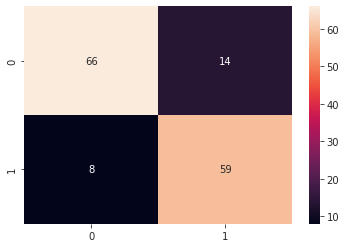

In [191]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

#SKlearn Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [98]:
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [99]:
y_pred = logre.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8231292517006803
